In [ ]:
Case Study
Questions:
1.The data file contains numerical attributes that describe a letter and its corresponding class. 
Read the datafile “letterCG.data” and set all the numerical attributes as features. 
Split the data in to train and test sets.

2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, 
keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners. 
Use decision tree classifier as the base classifier.

3.Repeat step2 with max_depth set as 2.
 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_14_Model_Selection_and_Boosting/letterCG'

df=pd.read_csv(data,sep=' ')

In [12]:
df.head(7)

,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 18
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN,NaN
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,NaN,NaN
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,NaN,NaN
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,NaN,NaN
5,G,2,1,2,2,1,7,7,6,5,6,6,10,2,9,4,9,NaN,NaN
6,G,3,7,4,5,3,6,5,5,6,6,6,9,2,9,3,7,NaN,NaN


In [13]:
df.dtypes

#gapminder_ocean.drop(['pop'], axis=1)

Class           object
x-box            int64
y-box            int64
width            int64
high             int64
Unnamed: 5       int64
onpix            int64
x-bar            int64
y-bar            int64
x2bar            int64
y2bar            int64
xybar            int64
x2ybr            int64
xy2br            int64
x-ege            int64
xegvy            int64
y-ege            int64
yegvx          float64
Unnamed: 18    float64
dtype: object

In [27]:
df=df.drop(['Unnamed: 5'],axis=1)
df=df.drop(['Unnamed: 18'],axis=1)


In [28]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "Type": {}'.format(df['Class'].unique()))

Missing values:
Class       0
x-box       0
y-box       0
width       0
high        0
onpix       0
x-bar       0
y-bar       0
x2bar       0
y2bar       0
xybar       0
x2ybr       0
xy2br       0
x-ege       0
xegvy       0
y-ege       0
yegvx    1509
dtype: int64

Number of duplicated records: 60

Unique values of "Type": ['C' 'G']


In [29]:
df=df.drop(['yegvx'],axis=1)

df.head(6)

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,C,4,10,5,8,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,6,6,7,6,10,7,12,2,9,4,9
5,G,2,1,2,2,7,7,6,5,6,6,10,2,9,4,9


In [30]:
X=df.iloc[:,1:16]
Y=df[['Class']]

In [31]:
X.head(2)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,4,10,5,8,5,7,7,10,7,6,13,1,8,4,9
1,3,5,4,4,4,8,5,7,12,9,11,1,10,2,7


In [32]:
Y.head(2)

,Class
0,C
1,C


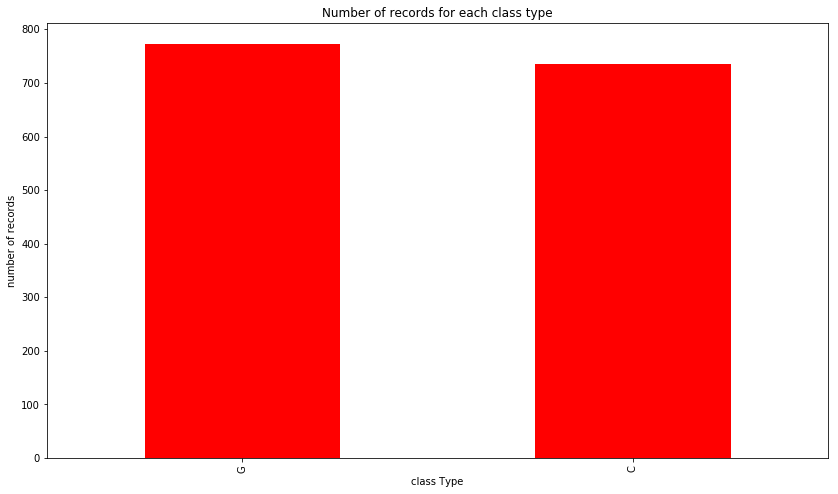

In [21]:
#1. Load the data from “glass.csv” and make a bar plot of different types of glasses.
ax = df['Class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of records for each class type", color='red')
ax.set_xlabel("class Type")
ax.set_ylabel("number of records")
plt.show()

In [33]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,4.059642,7.025182,4.848244,5.288933,6.169649,7.094102,5.947647,6.235255,8.084824,6.809808,10.737575,2.422797,8.616965,4.626243,8.893970
std,1.744379,3.327707,1.612338,2.156974,1.296437,1.138498,1.268069,2.071898,2.059967,1.443088,2.022762,1.768471,1.081741,1.578873,1.397002
min,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,2.000000,1.000000,4.000000,2.000000,4.000000,0.000000,5.000000,2.000000,4.000000
25%,3.000000,5.000000,4.000000,4.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,9.000000,1.000000,8.000000,4.000000,8.000000
50%,4.000000,7.000000,5.000000,6.000000,6.000000,7.000000,6.000000,6.000000,8.000000,7.000000,11.000000,2.000000,9.000000,4.000000,9.000000
75%,5.000000,9.000000,6.000000,7.000000,7.000000,8.000000,7.000000,8.000000,9.000000,8.000000,12.000000,3.000000,9.000000,5.000000,10.000000
max,10.000000,15.000000,10.000000,9.000000,11.000000,11.000000,10.000000,12.000000,13.000000,11.000000,15.000000,11.000000,13.000000,10.000000,14.000000


In [23]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
'''


In [34]:
X.head(2)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,4,10,5,8,5,7,7,10,7,6,13,1,8,4,9
1,3,5,4,4,4,8,5,7,12,9,11,1,10,2,7


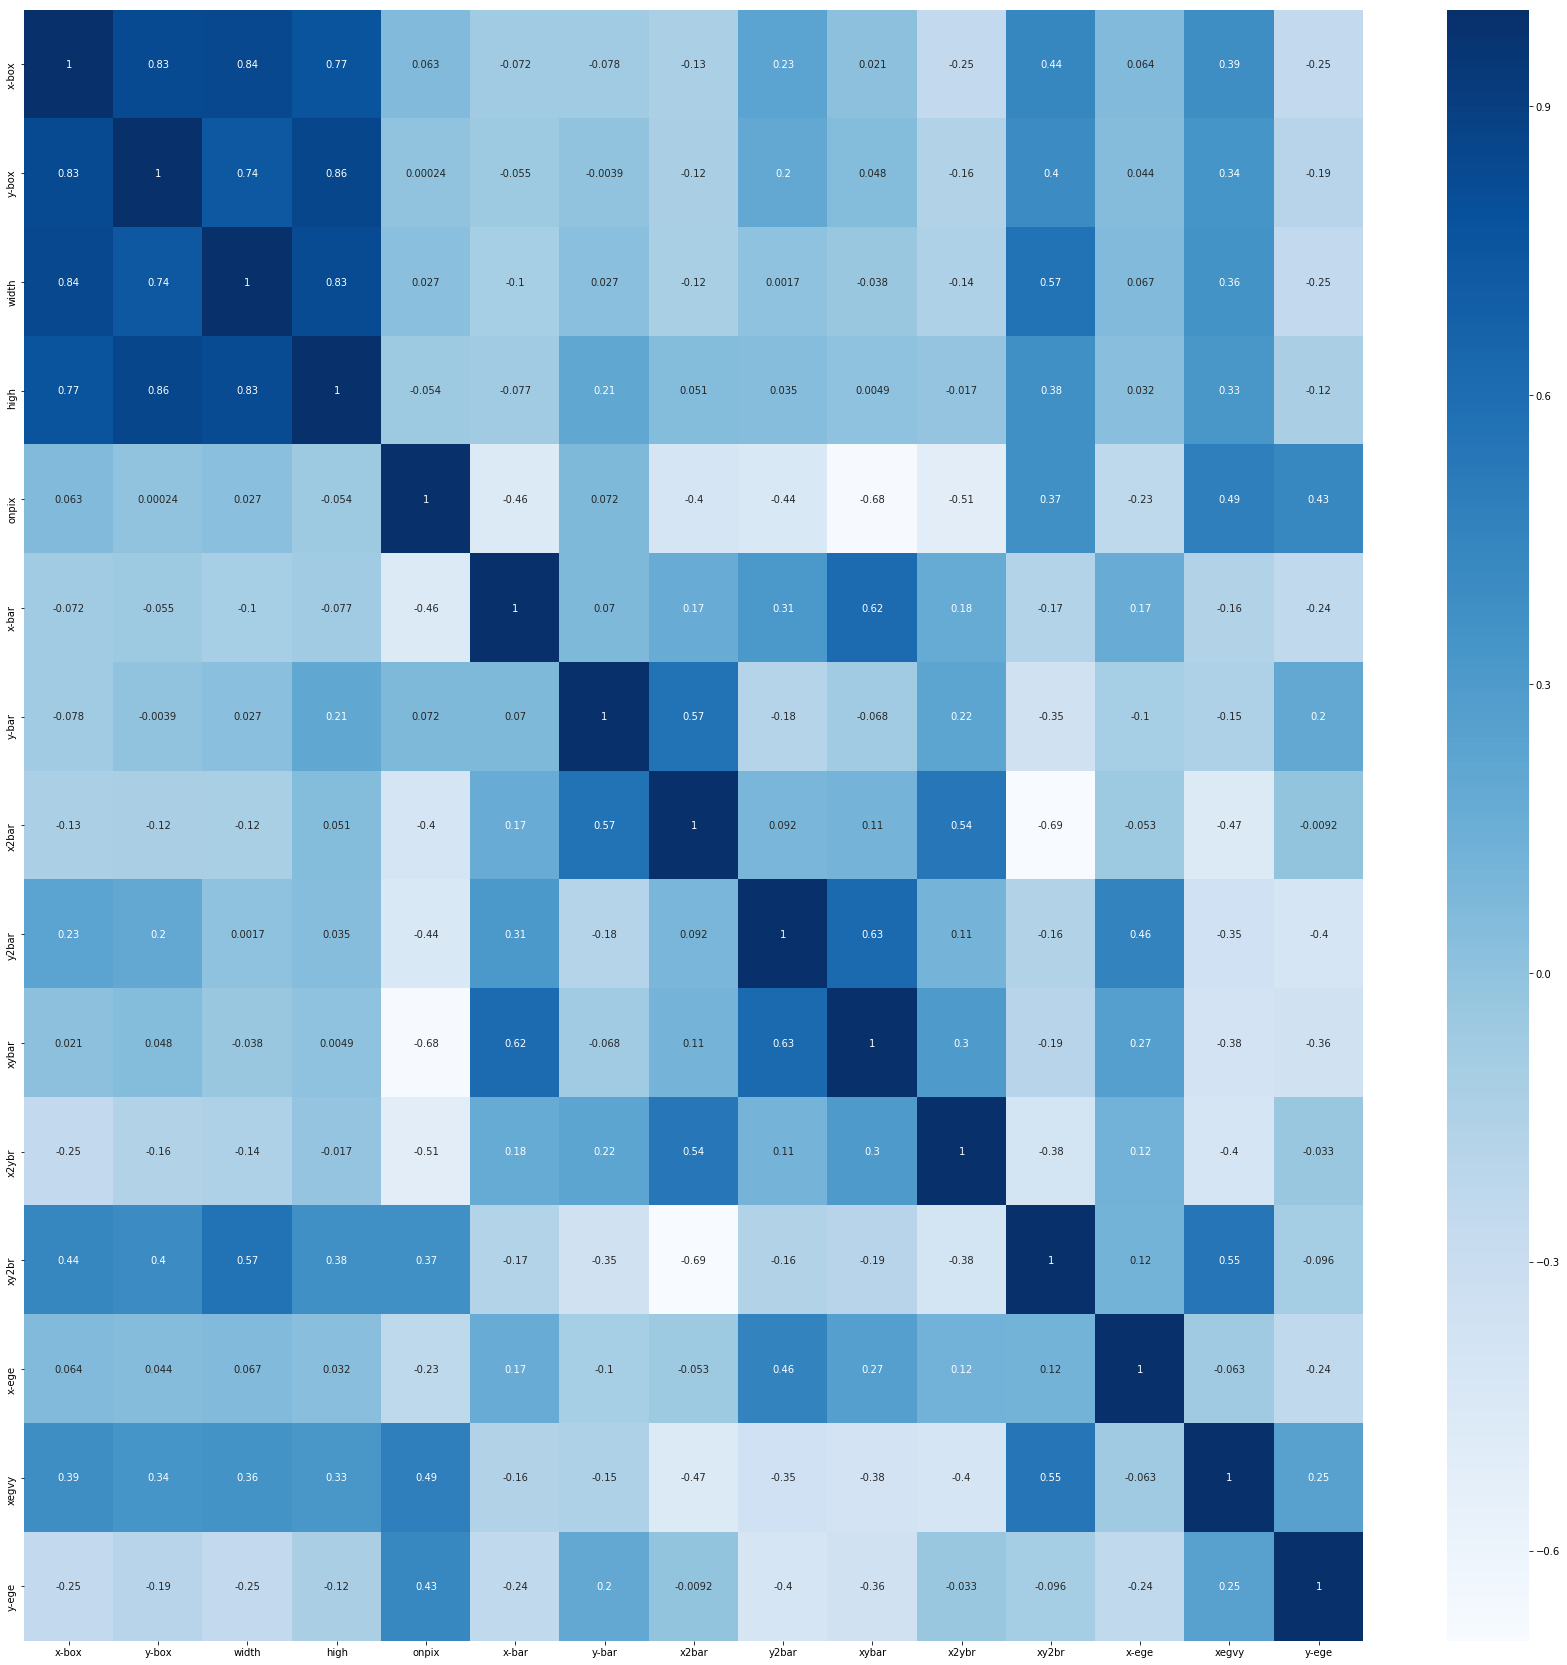

In [35]:
#finding correlation

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.iloc[:, 1:16].corr()
plt.figure(figsize=(30,30))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

In [36]:
df.head(5)

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,C,4,10,5,8,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,6,6,7,6,10,7,12,2,9,4,9


In [37]:
#There are no missing values or duplicated records. Next the diagnosis distribution is checked.
#Unique values of "Type": ['C' 'G']
total = df['Class'].count()
C = df[df['Class'] == "C"]['Class'].count()
print("C: ", C)
print("G: ", total - C)

C:  736
G:  773


In [38]:
df['Class'] = df['Class'].map({'C':1,'G':0})

In [39]:
df.head(6)

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,1,4,10,5,8,5,7,7,10,7,6,13,1,8,4,9
1,1,3,5,4,4,4,8,5,7,12,9,11,1,10,2,7
2,0,5,10,6,7,8,7,8,8,6,7,9,2,7,5,10
3,1,5,9,6,7,3,8,6,7,12,10,13,1,9,3,7
4,0,4,8,5,6,6,6,7,6,10,7,12,2,9,4,9
5,0,2,1,2,2,7,7,6,5,6,6,10,2,9,4,9


In [40]:
X=df.iloc[:,1:16]
Y=df[['Class']]

In [41]:
Y.head(8)

,Class
0,1
1,1
2,0
3,1
4,0
5,0
6,0
7,1


In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
#Next, we construct and fit our model to the training set. max_depth=1 is used to tell our model that 
#we’d like our forest to be composed of trees with a single decision node and two leaves. 
#n_estimators is used to specify the total number of trees in the forest.


In [44]:
#2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, 
#keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners. 
#Use decision tree classifier as the base classifier.

#Building the AdaBoost Model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create adaboost classifer object

classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=1)

# Train Adaboost Classifer

model=classifier.fit(x_train, y_train)



#Predict the response for test dataset
y_pred = model.predict(x_test)

#base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak 
#learner for training purpose. You can also specify different machine learning algorithms.

#n_estimators: Number of weak learners to train iteratively.

#learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.



/Users/atul595525/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
#Finally, we evaluate the model using a confusion matrix. 
#The model finished with with 2 false positives and 3 false negatives.

#CONFUSION_MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))






[[146  17]
 [ 53  86]]
Accuracy0.7682119205298014


In [47]:
from sklearn.model_selection import cross_val_score
reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
scores_ada = cross_val_score(reg_ada, X, Y, cv=6)
scores_ada.mean()

/Users/atul595525/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/atul595525/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/atul595525/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/atul595525/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

0.9522831214823246

In [68]:
#Approach 1
#Using train test data approach

import warnings
warnings.filterwarnings("ignore")



score = []
n_estimators_new=[]
for n_estimator in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] :
    reg_ada =AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=n_estimator)
    #scores_ada = cross_val_score(reg_ada, X, Y, cv=6)
    reg_ada.fit(x_train, y_train)
    y_pred = reg_ada.predict(x_test)
    
    score.append(metrics.accuracy_score(y_test, y_pred))
    n_estimators_new.append(n_estimator)
score



[0.7682119205298014,
 0.7880794701986755,
 0.7880794701986755,
 0.8443708609271523,
 0.8576158940397351,
 0.8609271523178808,
 0.8642384105960265,
 0.8642384105960265,
 0.8874172185430463,
 0.9039735099337748,
 0.8973509933774835,
 0.890728476821192,
 0.890728476821192,
 0.8940397350993378,
 0.9039735099337748,
 0.9072847682119205]

Text(0,0.5,'Accuracy')

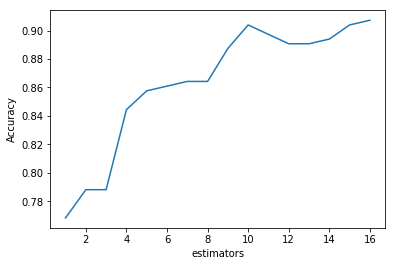

In [69]:
plt.plot(n_estimators_new, score)
plt.xlabel('estimators')
plt.ylabel('Accuracy')

In [70]:
#Approach 2: using Cross validation approach

#classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=1)

import warnings
warnings.filterwarnings("ignore")



score = []
n_estimators_new=[]
for n_estimator in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17] :
    reg_ada =AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=n_estimator)
    scores_ada = cross_val_score(reg_ada, X, Y, cv=6)
    score.append(scores_ada.mean())
    n_estimators_new.append(n_estimator)
score
#reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth))


[0.7680640612154557,
 0.7899528447058328,
 0.8018418179135312,
 0.8569209511161703,
 0.8721405383755982,
 0.8774341786293979,
 0.8900161259723013,
 0.8813521364278336,
 0.9045584013153735,
 0.8979182739939712,
 0.9091774700141233,
 0.8999287716857438,
 0.9091880098653006,
 0.9138176394949302,
 0.9231139147115242,
 0.9270795337169839,
 0.9244367081936802]

In [53]:
n_estimators_new

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Text(0,0.5,'Accuracy')

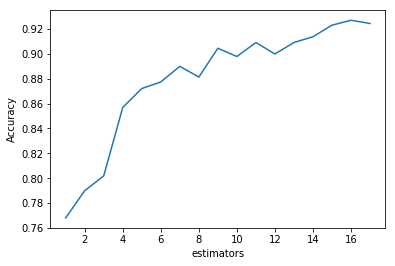

In [71]:
#plotting accuracy

plt.plot(n_estimators_new, score)
plt.xlabel('estimators')
plt.ylabel('Accuracy')

<BarContainer object of 17 artists>

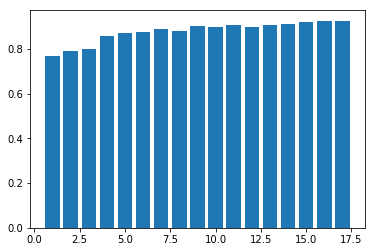

In [55]:
plt.bar(n_estimators_new, score)

In [ ]:
#3.Repeat step2 with max_depth set as 2.

In [63]:
#Approach 1
#Using train test data approach

import warnings
warnings.filterwarnings("ignore")



score = []
n_estimators_new=[]
for n_estimator in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] :
    reg_ada =AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=n_estimator)
    #scores_ada = cross_val_score(reg_ada, X, Y, cv=6)
    reg_ada.fit(x_train, y_train)
    y_pred = reg_ada.predict(x_test)
    
    score.append(metrics.accuracy_score(y_test, y_pred))
    n_estimators_new.append(n_estimator)
score




[0.8509933774834437,
 0.9205298013245033,
 0.890728476821192,
 0.9139072847682119,
 0.9437086092715232,
 0.9403973509933775,
 0.9403973509933775,
 0.9503311258278145,
 0.9503311258278145,
 0.9536423841059603,
 0.9635761589403974,
 0.9635761589403974,
 0.9602649006622517,
 0.9635761589403974,
 0.9735099337748344,
 0.9735099337748344]

Text(0,0.5,'Accuracy')

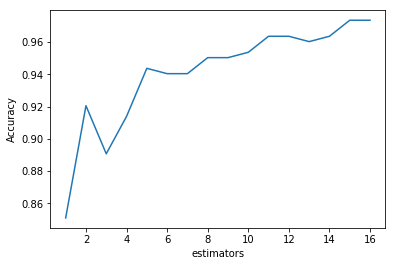

In [64]:
plt.plot(n_estimators_new, score)
plt.xlabel('estimators')
plt.ylabel('Accuracy')

In [65]:
#Approach 2: Using cross validation approach

import warnings
warnings.filterwarnings("ignore")



score = []
n_estimators_new=[]
for n_estimator in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] :
    reg_ada =AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=n_estimator)
    scores_ada = cross_val_score(reg_ada, X, Y, cv=6)
    score.append(scores_ada.mean())
    n_estimators_new.append(n_estimator)
score



[0.8575320727671326,
 0.9005636923206644,
 0.918465756023525,
 0.9270689306266996,
 0.9370001897173212,
 0.9396457134425261,
 0.9443070469444971,
 0.947619195176964,
 0.9496138830919708,
 0.9555820738211177,
 0.9496164969750627,
 0.9555926979911042,
 0.9529313434094311,
 0.9602275975463227,
 0.9641984864773709,
 0.966851915090959]

Text(0,0.5,'Accuracy')

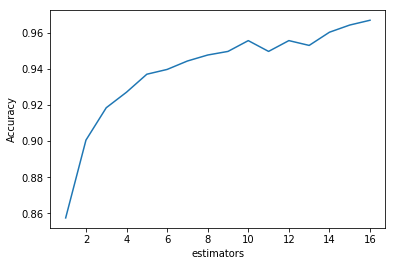

In [66]:
#plotting accuracy

plt.plot(n_estimators_new, score)
plt.xlabel('estimators')
plt.ylabel('Accuracy')

In [ ]:
'''
Using Different Base Learners

I have used SVC as a base estimator. You can use any ML learner as base estimator 
if it accepts sample weight such as Decision Tree, Support Vector Classifier.

# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

'''